In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
import os
import joblib
from preprocess import feature_engineering, preprocess

#@ Visualization Dependencies:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc("axes", labelsize=14)
mpl.rc("xtick", labelsize=12)
mpl.rc("ytick", labelsize=12)

PROJECT_ROOT_DIR = "."
ID = "California Housing"
IMAGE_PATH = os.path.join(PROJECT_ROOT_DIR, "images", ID)
if not os.path.isdir(IMAGE_PATH):
    os.makedirs(IMAGE_PATH)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
  path = os.path.join(IMAGE_PATH, fig_id + "." + fig_extension)
  print("Saving Figure", fig_id)
  if tight_layout:
    plt.tight_layout()
  plt.savefig(path, format=fig_extension, dpi=resolution)

#@ Ignoring the Warnings:
import warnings
warnings.filterwarnings(action="ignore", message="^ internal")

In [2]:
df = pd.read_csv('./data/housing.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


## Exploratory Data Analysis (EDA)

In [3]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


## EDA:
##### 1 - `total_bedrooms` has 20433 rows only out of 20640 
##### 2 - `ocean_proximity` is of type object and the values is repititve which means it might be categorical attribute

In [5]:
print(df['ocean_proximity'].value_counts())
df.describe(include=['object'])

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64


,ocean_proximity
count,20640
unique,5
top,<1H OCEAN
freq,9136


Saving Figure Histogram Plots


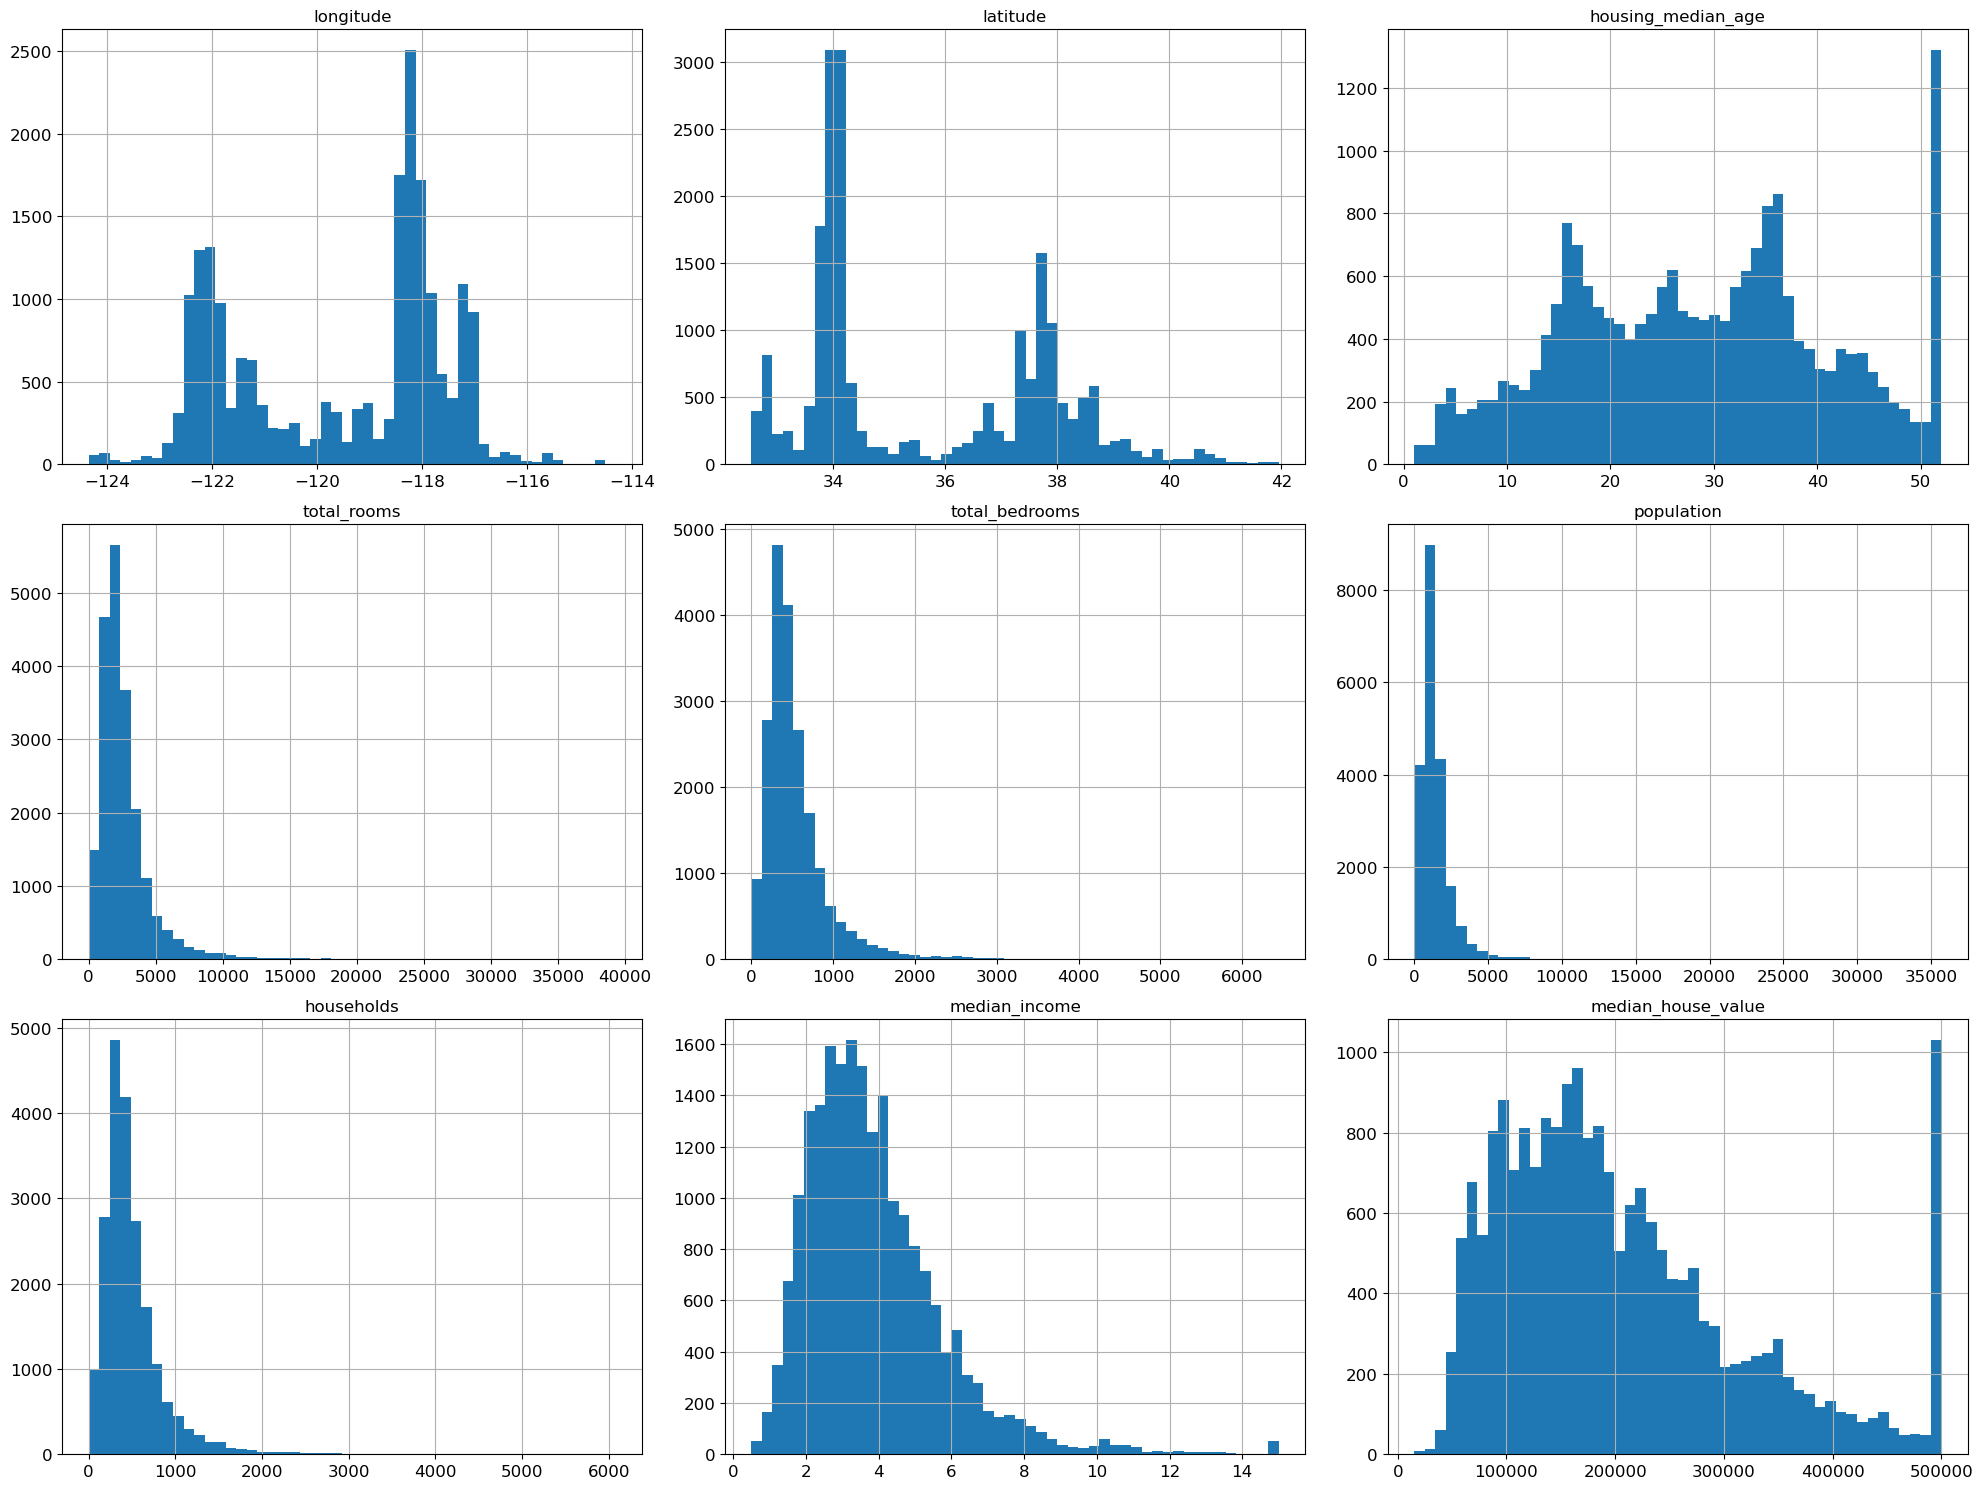

In [6]:
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(20, 15))  
save_fig("Histogram Plots")              
plt.show() 

#### Now keep the test data away from any preprocessing

In [7]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=11)

train_set.shape, test_set.shape

((16512, 10), (4128, 10))

<Axes: >

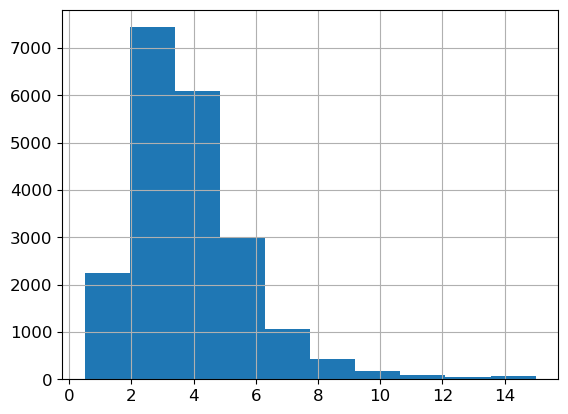

In [8]:
df['median_income'].hist()

#### - appears that most of the income are between 2 and 6
#### - i will create income category attribute with 5 cats with labels from 1 to 5  

income_cat
3    7236
2    6581
4    3639
5    2362
1     822
Name: count, dtype: int64


<Axes: >

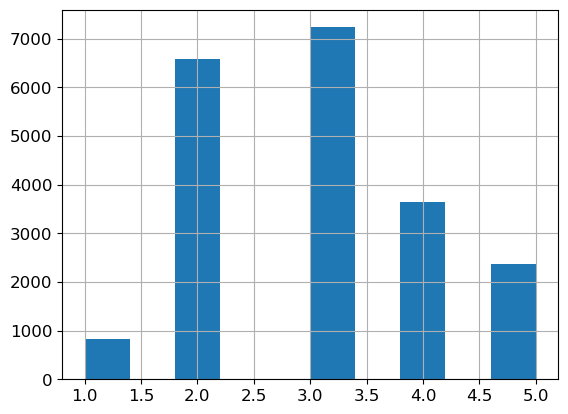

In [9]:
df['income_cat'] =  pd.cut(df["median_income"],
                               bins=[0., 1.5, 3, 4.5, 6, np.inf],
                               labels=[1, 2, 3, 4, 5])
print(df['income_cat'].value_counts())
df['income_cat'].hist()

#### Now i will do stratified sampling based on the income category

In [10]:
#@ Stratified Sampling based on Income Category:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=11)
for train_index, test_index in split.split(df, df["income_cat"]):
  strat_train_set = df.loc[train_index]
  strat_test_set = df.loc[test_index]
print(strat_test_set["income_cat"].value_counts() / len(strat_test_set))            
print("\n")
print(df["income_cat"].value_counts() / len(df))  

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64


income_cat
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: count, dtype: float64


In [11]:
#@ Removing the Income Cat from the Data:
for set_ in (strat_train_set, strat_test_set):
  set_.drop("income_cat", axis=1, inplace=True)

#### More In Depth EDA 

Saving Figure Geographical Plot


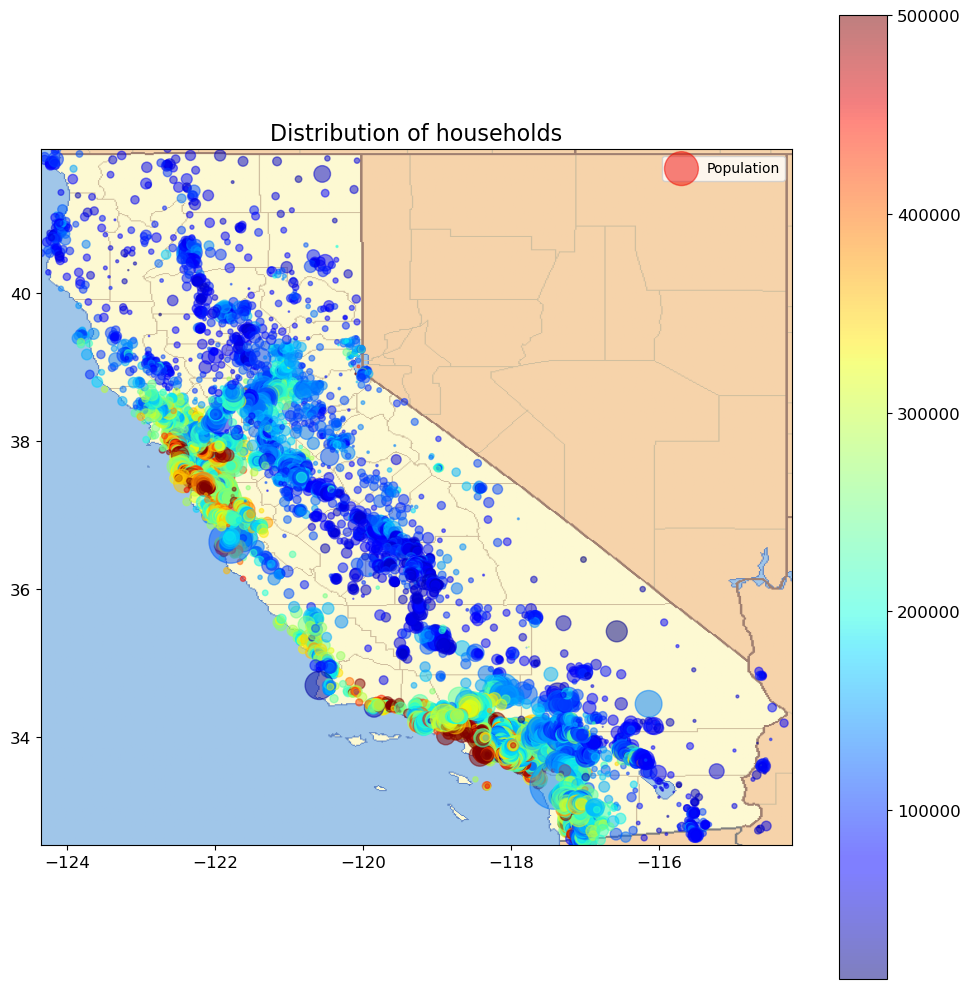

In [12]:
plt.figure(figsize=(10,10))
img=plt.imread('images/california.png')
plt.imshow(img,zorder=0,extent=[-124.35,-114.2,32.54,41.95])

plt.scatter(x=df['longitude'],y=df['latitude'],alpha=0.5,s=df['population']/30,c=df['median_house_value'],
            cmap=plt.get_cmap("jet"),zorder=1,label='Population')
plt.colorbar()
plt.title("Distribution of households",size=16)
plt.legend()
save_fig("Geographical Plot")
plt.show()

**The Image tells that the Housing prices are very much related to the location and to the population density.**

**now i'm gonna compute the correlation matrix**

In [13]:
corr_matrix = df.corr(numeric_only=True)
corr_with_y = corr_matrix["median_house_value"].sort_values(ascending=False)       

**shows that median income is the most correlated feature with house value**

Saving Figure Correlation with Median House Value


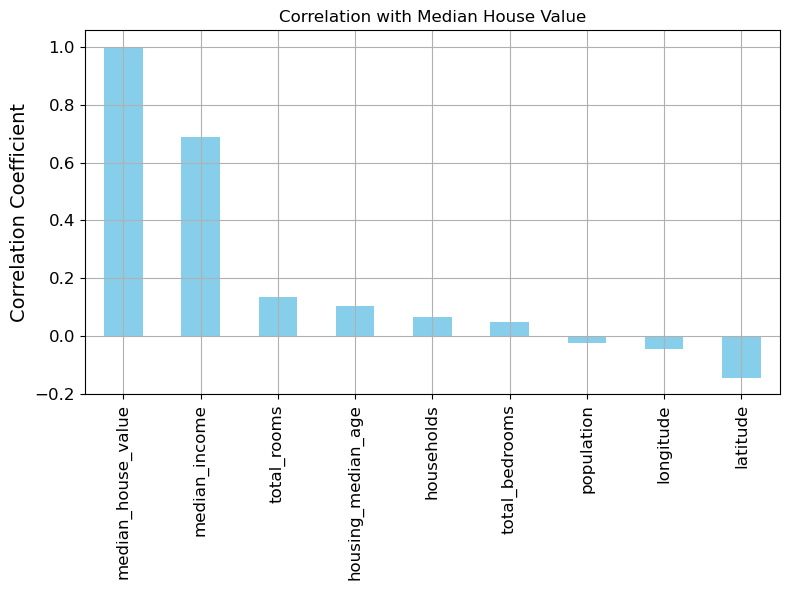

In [ ]:
plt.figure(figsize=(8, 6))
corr_with_y.plot(kind='bar', color='skyblue')
plt.title("Correlxation with Median House Value")
plt.ylabel("Correlation Coefficient")
plt.grid(True)
save_fig("Correlation with Median House Value")
plt.show()

Saving Figure Correlation Matrix Heatmap


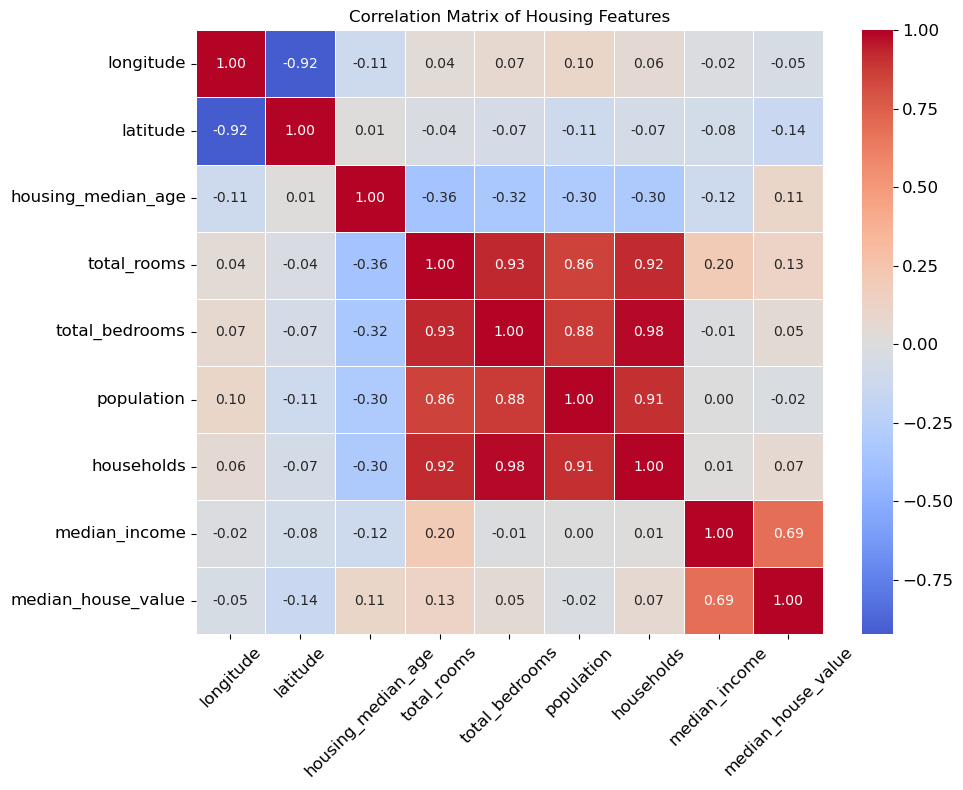

In [15]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,         
    cmap="coolwarm",    
    center=0,           
    fmt=".2f",          
    linewidths=0.5      
)
plt.title("Correlation Matrix of Housing Features")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
save_fig("Correlation Matrix Heatmap")
plt.show()

**appears that the median income is the most promising feature to predict the median house value**

### Feature Engineering
---
will create some attribute combinations, "Ratios Often Tell More Than Raw Counts"

In [16]:
df['rooms_per_household'] = df['total_rooms']/df['households']
df['bedrooms_per_room'] = df['total_bedrooms']/df['total_rooms']
df['population_per_household'] = df['population']/df['households']
df['location'] = df['longitude']+df['latitude']

In [17]:
corr_matrix = df.corr(numeric_only=True)
print(corr_matrix["median_house_value"].sort_values(ascending=False))

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
location                   -0.491520
Name: median_house_value, dtype: float64


**appears that we got some promising new features like `rooms_per_household`, `bedrooms_per_room` and `locaiton` that have slightly high correlation**

### Correlation Insights

1. **`median_income`**: Shows the strongest positive correlation with `median_house_value` (0.68), indicating that higher income areas tend to have more expensive houses. It will be a key predictor.

2. **`rooms_per_household`**: Positively correlated (0.15). This normalized feature provides better insight than total room count, but both may be useful in combination.

3. **`total_rooms`**: Although weakly correlated (0.13), it could still contribute value in non-linear models or when interacting with other variables.

4. **`housing_median_age`**: Slight positive correlation (0.10) suggests that older houses may be marginally more valuable in some regions.

5. **`households`**: Very weak correlation (0.06), but might still capture local neighborhood characteristics or density.

6. **`total_bedrooms`**: Weak correlation (0.04), but can still be informative, especially when combined with other features like room count or population.

7. **`population_per_household`**: Slight negative correlation (-0.02), yet could help capture crowding or living conditions when used alongside income or housing age.

8. **`population`**: Also weakly negative (-0.02), but still worth keeping to allow the model to learn any potential hidden patterns.

9. **`longitude` / `latitude`**: Despite low correlation individually, these geographic coordinates are vital for spatial relationships — especially useful in models that support feature interactions or when used with geospatial clustering.

10. **`bedrooms_per_room`**: Moderate negative correlation (-0.25) indicates that houses with more bedrooms per room tend to have lower prices. Valuable normalized metric.

11. **`location`**: Strong negative correlation (-0.49). A powerful summary feature, but latitude and longitude are retained as well to preserve detailed spatial information.


### Preparing Data For Machine Learning Model

In [18]:
X = strat_train_set.drop("median_house_value", axis=1)
y = strat_train_set['median_house_value']

X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
13406,-117.46,34.09,8.0,4711.0,963.0,3310.0,988.0,3.5488,INLAND
15049,-116.94,32.78,17.0,13559.0,2656.0,6990.0,2533.0,3.4340,<1H OCEAN
4600,-118.27,34.04,13.0,1784.0,NaN,2158.0,682.0,1.7038,<1H OCEAN
2109,-119.75,36.75,50.0,1515.0,294.0,852.0,297.0,1.9955,INLAND
15760,-122.42,37.77,52.0,1086.0,349.0,589.0,361.0,2.5186,NEAR BAY
...,...,...,...,...,...,...,...,...,...
10481,-117.68,33.59,12.0,3473.0,466.0,1569.0,450.0,8.8636,<1H OCEAN
2112,-119.74,36.76,36.0,912.0,216.0,842.0,219.0,1.4766,INLAND
10617,-117.81,33.68,4.0,1545.0,304.0,788.0,296.0,4.5469,<1H OCEAN
20294,-119.19,34.17,27.0,2183.0,364.0,1458.0,388.0,4.4567,NEAR OCEAN


In [19]:
X.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        169
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

In [ ]:
X = feature_engineering(X)

num_features = [col for col in X.columns if X[col].dtype in [np.float64, np.int64]]
cat_features = [col for col in X.columns if X[col].dtype == 'object']

num_pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Assuming you're using this
])

cat_pipeline = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore')),
])

preprocessing_pipeline = ColumnTransformer(
    [
        ("num", num_pipeline, num_features),
        ("cat", cat_pipeline, cat_features),
    ]
)

preprocessing_pipeline.fit(X)
joblib.dump(preprocessing_pipeline, "models/preprocessing_pipeline.pkl")

X_prepared = preprocessing_pipeline.transform(X)

preprocessor = preprocessing_pipeline

try:
    num_col_names = preprocessor.named_transformers_['num'].named_steps['scaler'].get_feature_names_out()
except:
    num_col_names = num_features

cat_encoder = preprocessor.named_transformers_['cat'].named_steps['encoder']
cat_col_names = cat_encoder.get_feature_names_out(cat_features)

all_col_names = list(num_col_names) + list(cat_col_names)

X_prepared = pd.DataFrame(
    X_prepared.toarray() if hasattr(X_prepared, "toarray") else X_prepared,
    columns=all_col_names
)


In [21]:
X_prepared

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household,location,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,1.056571,-0.725178,-1.639153,0.973143,1.036212,1.678876,1.310870,-0.168764,-0.302901,-0.148496,0.020567,0.691892,0.0,1.0,0.0,0.0,0.0
1,1.315998,-1.336938,-0.923821,5.093608,5.129243,4.946795,5.430821,-0.229117,-0.030948,-0.296355,-0.030329,-0.275627,1.0,0.0,0.0,0.0,0.0
2,0.652465,-0.748528,-1.241747,-0.389945,NaN,0.655875,0.494879,-1.138717,-1.303969,NaN,0.004541,-0.361356,1.0,0.0,0.0,0.0,0.0
3,-0.085903,0.517022,1.699063,-0.515216,-0.581176,-0.503881,-0.531775,-0.985364,-0.148121,-0.327992,-0.020926,1.145034,0.0,1.0,0.0,0.0,0.0
4,-1.417959,0.993354,1.858026,-0.714999,-0.448207,-0.737431,-0.361111,-0.710360,-1.121430,1.878549,-0.127531,-0.875734,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16507,0.946814,-0.958674,-1.321228,0.396613,-0.165345,0.132830,-0.123780,2.625329,1.068931,-1.365913,0.032327,-0.189897,1.0,0.0,0.0,0.0,0.0
16508,-0.080914,0.521692,0.586324,-0.796030,-0.769750,-0.512762,-0.739773,-1.258160,-0.583743,0.413558,0.063184,1.169528,0.0,1.0,0.0,0.0,0.0
16509,0.881957,-0.916645,-1.957079,-0.501246,-0.557000,-0.560715,-0.534442,0.355956,-0.092968,-0.281118,-0.038723,-0.238886,1.0,0.0,0.0,0.0,0.0
16510,0.193479,-0.687819,-0.129008,-0.204133,-0.411943,0.034260,-0.289111,0.308536,0.096185,-0.801465,0.055685,-1.328875,0.0,0.0,0.0,0.0,1.0


## Model Building

In [22]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(n_estimators=160, min_samples_leaf=3,                            
                                   n_jobs=-1, random_state=11)
forest_reg.fit(X_prepared, y)
y[1]


358500.0

In [23]:
forest_y_predict = forest_reg.predict(X_prepared)
forest_mse = mean_squared_error(y, forest_y_predict)
forest_rmse = np.sqrt(forest_mse)
print("Forest RMSE => ", forest_rmse)

Forest RMSE =>  26190.328876273335


In [24]:
from sklearn.model_selection import cross_val_score
forest_scores = cross_val_score(forest_reg, X_prepared, y,                    
                                scoring="neg_mean_squared_error", cv=10)
forest_scores_rmse = np.sqrt(-forest_scores)

def display_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())

display_scores(forest_scores_rmse)

Scores:  [47783.00074953 46865.79884326 45300.20490782 46779.14491536
 49940.59717922 48896.76376086 47514.1505884  48092.12290986
 49576.19176249 48871.82690696]
Mean:  47961.98025237612


In [25]:
import joblib
joblib.dump(forest_reg, 'models/forest_model.pkl')

['models/forest_model.pkl']

## Model Paramater Tuning

In [26]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from IPython.display import display

param_distributions = {
    "n_estimators": randint(1, 200),
    "max_features": randint(1, 10),
    "min_samples_leaf": randint(1, 8)
}

random_search = RandomizedSearchCV(
    estimator=forest_reg,
    param_distributions=param_distributions,
    n_iter=20,
    cv=5,
    scoring="neg_mean_squared_error",
    random_state=11
)

random_search.fit(X_prepared, y)

print("Best Parameters:\n", random_search.best_params_)
print("\nBest Estimator:\n", random_search.best_estimator_)

print("\nCross-validation Scores (RMSE):")
cv_results = random_search.cv_results_
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    rmse = np.sqrt(-mean_score)
    print(f"RMSE: {rmse:.4f}, Params: {params}")

print("\nFull Cross-validation Results:")
display(pd.DataFrame(cv_results))


Best Parameters:
 {'max_features': 6, 'min_samples_leaf': 3, 'n_estimators': 188}

Best Estimator:
 RandomForestRegressor(max_features=6, min_samples_leaf=3, n_estimators=188,
                      n_jobs=-1, random_state=11)

Cross-validation Scores (RMSE):
RMSE: 59131.7329, Params: {'max_features': 1, 'min_samples_leaf': 4, 'n_estimators': 82}
RMSE: 48142.3381, Params: {'max_features': 8, 'min_samples_leaf': 6, 'n_estimators': 77}
RMSE: 50935.7894, Params: {'max_features': 2, 'min_samples_leaf': 3, 'n_estimators': 25}
RMSE: 60591.4807, Params: {'max_features': 1, 'min_samples_leaf': 6, 'n_estimators': 161}
RMSE: 47116.3934, Params: {'max_features': 5, 'min_samples_leaf': 3, 'n_estimators': 141}
RMSE: 50634.2414, Params: {'max_features': 2, 'min_samples_leaf': 3, 'n_estimators': 38}
RMSE: 47674.7316, Params: {'max_features': 6, 'min_samples_leaf': 5, 'n_estimators': 82}
RMSE: 47238.0310, Params: {'max_features': 9, 'min_samples_leaf': 1, 'n_estimators': 146}
RMSE: 48738.6670, Params: 

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.233042,0.017741,0.026820,0.000571,1,4,82,"{'max_features': 1, 'min_samples_leaf': 4, 'n_...",-3.415503e+09,-3.477358e+09,-3.511214e+09,-3.507905e+09,-3.570830e+09,-3.496562e+09,5.059312e+07,18
1,0.882442,0.021873,0.026615,0.000179,8,6,77,"{'max_features': 8, 'min_samples_leaf': 6, 'n_...",-2.189886e+09,-2.172143e+09,-2.423444e+09,-2.324036e+09,-2.478915e+09,-2.317685e+09,1.222583e+08,9
2,0.123810,0.004704,0.015768,0.000133,2,3,25,"{'max_features': 2, 'min_samples_leaf': 3, 'n_...",-2.455051e+09,-2.437055e+09,-2.726919e+09,-2.611645e+09,-2.741602e+09,-2.594455e+09,1.293854e+08,16
3,0.396329,0.016521,0.052825,0.010798,1,6,161,"{'max_features': 1, 'min_samples_leaf': 6, 'n_...",-3.518364e+09,-3.584940e+09,-3.861168e+09,-3.667003e+09,-3.725163e+09,-3.671328e+09,1.181667e+08,20
4,1.125252,0.063043,0.042888,0.005240,5,3,141,"{'max_features': 5, 'min_samples_leaf': 3, 'n_...",-2.078487e+09,-2.095515e+09,-2.325396e+09,-2.250419e+09,-2.349956e+09,-2.219955e+09,1.135293e+08,3
5,0.197530,0.007686,0.017176,0.000973,2,3,38,"{'max_features': 2, 'min_samples_leaf': 3, 'n_...",-2.401681e+09,-2.400753e+09,-2.703396e+09,-2.567049e+09,-2.746253e+09,-2.563826e+09,1.453642e+08,15
6,0.742926,0.024737,0.026813,0.000328,6,5,82,"{'max_features': 6, 'min_samples_leaf': 5, 'n_...",-2.138740e+09,-2.119919e+09,-2.375726e+09,-2.309033e+09,-2.420982e+09,-2.272880e+09,1.226449e+08,8
7,2.655936,0.073996,0.055190,0.006446,9,1,146,"{'max_features': 9, 'min_samples_leaf': 1, 'n_...",-2.092078e+09,-2.105950e+09,-2.350750e+09,-2.231987e+09,-2.376393e+09,-2.231432e+09,1.186727e+08,5
8,0.972448,0.088295,0.047518,0.006832,4,7,172,"{'max_features': 4, 'min_samples_leaf': 7, 'n_...",-2.226208e+09,-2.242392e+09,-2.489726e+09,-2.404495e+09,-2.514469e+09,-2.375458e+09,1.210013e+08,12
9,0.957165,0.056440,0.049569,0.005622,3,3,193,"{'max_features': 3, 'min_samples_leaf': 3, 'n_...",-2.156036e+09,-2.187519e+09,-2.415377e+09,-2.351844e+09,-2.480990e+09,-2.318353e+09,1.268468e+08,10


In [27]:
final_model = random_search.best_estimator_
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()
X_test_prepared = preprocess(X_test, preprocessing_pipeline)
y_pred = final_model.predict(X_test_prepared)
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

--- preprocess.py: preprocess function called ---
Transformed shape: (4128, 17)
RMSE: 45938.95205575553


#### Let's see what features are the most important for the model

Saving Figure Feature Importances


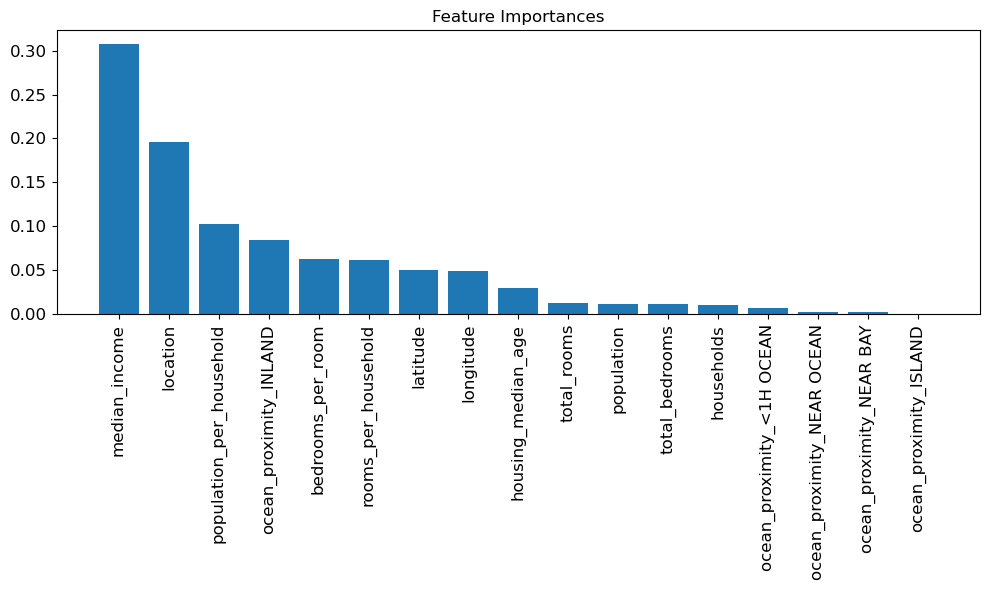

In [28]:
feature_names = X_test_prepared.columns
importances = final_model.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices], align='center')
plt.xticks(range(len(importances)), feature_names[indices], rotation=90)
plt.tight_layout()
save_fig("Feature Importances")
plt.show()


In [29]:
joblib.dump(final_model, "models/final_model.pkl")

['models/final_model.pkl']